 # Mobile User Behavior Prediction

![Mobile_user](https://tweakyourbiz.com/wp-content/uploads/2022/05/shutterstock_409650142.jpg)


## Importing modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [2]:
df = pd.read_csv('/content/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [5]:
df.shape

(700, 11)

In [6]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [7]:
# deleting User ID column
del df['User ID']

In [8]:
for col in df.columns:
    if df[col].dtypes == 'O':
        print(f"Value count of {col} :\n{df[col].value_counts()}\n")

Value count of Device Model :
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Value count of Operating System :
Operating System
Android    554
iOS        146
Name: count, dtype: int64

Value count of Gender :
Gender
Male      364
Female    336
Name: count, dtype: int64



## Converting categorical data

In [9]:
categorical_cols = []
for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_cols.append(col)

categorical_cols

['Device Model', 'Operating System', 'Gender']

In [10]:
df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
df_encoded.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,393,6.4,1872,67,1122,40,4,False,False,False,False,False,True
1,268,4.7,1331,42,944,47,3,True,False,False,False,False,False
2,154,4.0,761,32,322,42,2,False,False,True,False,False,True
3,239,4.8,1676,56,871,20,3,False,False,False,False,False,True
4,187,4.3,1367,58,988,31,3,False,False,False,True,True,False


## Dividing independent and dependent dataset

In [11]:
X = df_encoded.drop('User Behavior Class', axis = 1)
y = df_encoded['User Behavior Class']

## Splitting train and test dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((560, 12), (140, 12))

In [14]:
y_train.shape, y_test.shape

((560,), (140,))

In [15]:
X_train

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
82,330,7.2,2363,77,1133,21,False,False,True,False,False,False
51,245,5.9,1243,52,885,29,False,False,True,False,False,True
220,433,6.8,2093,75,1300,32,True,False,False,False,False,True
669,160,3.2,648,31,339,27,False,True,False,False,False,False
545,50,2.0,362,17,182,34,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
71,521,9.0,2902,97,1701,37,False,False,False,True,True,True
106,152,2.7,642,38,596,55,False,False,False,False,False,True
270,426,6.5,1969,78,1266,53,False,False,True,False,False,False
435,105,3.4,798,21,467,34,False,False,True,False,False,False


## Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building network using keras

In [17]:
from keras.models import Sequential
from keras.layers import Dense

### Buiding layers

In [18]:
model = Sequential([
    Dense(12, activation = 'relu', input_dim = X_train_scaled.shape[1]),
    Dense(12, activation = 'relu'),
    Dense(5, activation = 'softmax')
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377 (1.47 KB)

 Trainable params: 377 (1.47 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [20]:

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

### Train the model

In [21]:
history = model.fit(X_train_scaled, y_train - 1, batch_size = 32, epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.3437 - loss: 1.5001 - val_accuracy: 0.4821 - val_loss: 1.2097
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4539 - loss: 1.0955 - val_accuracy: 0.5982 - val_loss: 0.8602
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5965 - loss: 0.7972 - val_accuracy: 0.6607 - val_loss: 0.6864
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7362 - loss: 0.6200 - val_accuracy: 0.8661 - val_loss: 0.5033
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8911 - loss: 0.4595 - val_accuracy: 0.8929 - val_loss: 0.3683
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9375 - loss: 0.3108 - val_accuracy: 0.9107 - val_loss: 0.2779
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9427 - loss: 0.2299 - val_accuracy: 0.9375 - val_loss: 0.2096
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9641 - loss: 0.1695 - val_accuracy: 0.9464 

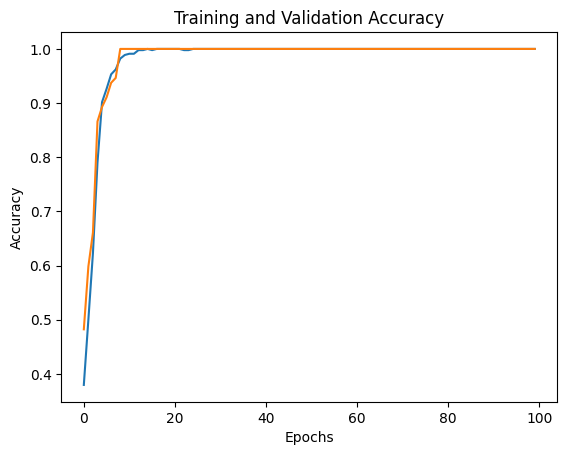

In [22]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

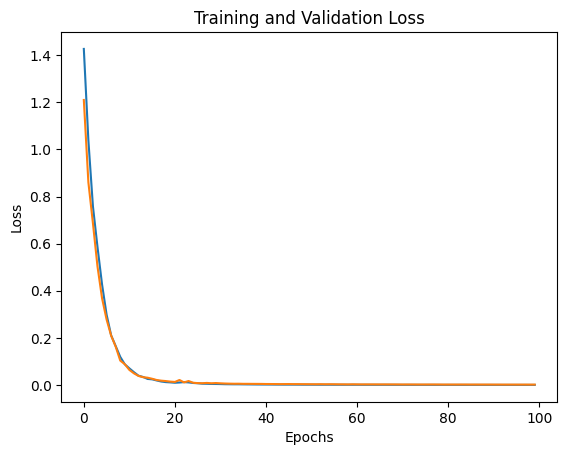

In [23]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the model

In [24]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis = 1) + 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [25]:
y_pred_classes[:10]

array([4, 1, 1, 2, 3, 2, 2, 1, 4, 3])

In [26]:
y_test[:10]

,User Behavior Class
158,4
500,1
396,1
155,2
321,3
212,2
234,2
289,1
300,4
356,3


### Confusion matrix and Classication report of the model

In [27]:
print('Confusion_matrix :\n',confusion_matrix(y_test - 1, y_pred_classes))
print('Classification report :\n',classification_report(y_test, y_pred_classes))

Confusion_matrix :
 [[ 0 27  0  0  0  0]
 [ 0  0 29  0  0  0]
 [ 0  0  0 34  0  0]
 [ 0  0  0  0 27  0]
 [ 0  0  0  0  0 23]
 [ 0  0  0  0  0  0]]
Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



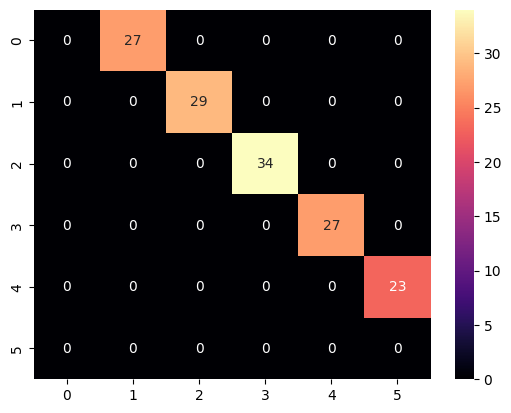

In [28]:
sns.heatmap(data = confusion_matrix(y_test - 1, y_pred_classes), annot = True, cmap = 'magma')
plt.show()